references：
https://openaccess.thecvf.com/content_ECCV_2018/papers/Sanghyun_Woo_Convolutional_Block_Attention_ECCV_2018_paper.pdf
https://colab.research.google.com/drive/1U2cbuk9JHyuctTKAHQ1fJqRliCayhDBp#scrollTo=Q-hZ1yQCzr5d
https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/(VGG)

https://androidkt.com/how-to-use-vgg-model-in-tensorflow-keras/

https://www.kaggle.com/code/hafizurrahman/flower-classification-resnet50-transfer-learning/notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
import json
import os
from cv2 import resize

In [ ]:
img_height = 224
img_width = 224


train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/My Drive/flower/dataset/train',
  validation_split=None,
  image_size=(img_height, img_width),
  batch_size=32,
  seed=42,
  shuffle=True)

val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/My Drive/flower/dataset/valid',
  validation_split=None,
  image_size=(img_height, img_width),
  batch_size=32,
  seed=42,
  shuffle=True)

Found 6552 files belonging to 102 classes.
Found 818 files belonging to 102 classes.


In [ ]:
with open('/content/drive/My Drive/flower/cat_to_name.json') as f:
    cat_to_name = json.load(f)

# class_names are inferred labels from folder names of type string (e.g. '0')
# the internal integer label values are different from the values in the JSON
# so these functions are necessary

# convert internal tag integer to readable flower name
def flower_name(val):
    return cat_to_name[train_ds.class_names[val]]

# convert label from CSV to internal label value
def to_internal_tag(name_tag):
    return train_ds.class_names.index(str(name_tag))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.optimizers import Adam
import keras

In [ ]:
model=models.Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
hist = model.fit_generator(steps_per_epoch=10,generator=train_ds, validation_data= val_ds, validation_steps=10,epochs=20)



Epoch 1/20


<ipython-input-53-5d375107deff>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(steps_per_epoch=10,generator=train_ds, validation_data= val_ds, validation_steps=10,epochs=20)


10/10 [==============================] - 5s 308ms/step - loss: 0.0000e+00 - accuracy: 0.0063 - val_loss: 0.0000e+00 - val_accuracy: 0.0094
Epoch 2/20
10/10 [==============================] - 3s 294ms/step - loss: 0.0000e+00 - accuracy: 0.0031 - val_loss: 0.0000e+00 - val_accuracy: 0.0031
Epoch 3/20
10/10 [==============================] - 3s 295ms/step - loss: 0.0000e+00 - accuracy: 0.0094 - val_loss: 0.0000e+00 - val_accuracy: 0.0063
Epoch 4/20
10/10 [==============================] - 3s 366ms/step - loss: 0.0000e+00 - accuracy: 0.0094 - val_loss: 0.0000e+00 - val_accuracy: 0.0094
Epoch 5/20
10/10 [==============================] - 3s 284ms/step - loss: 0.0000e+00 - accuracy: 0.0094 - val_loss: 0.0000e+00 - val_accuracy: 0.0094
Epoch 6/20
10/10 [==============================] - 3s 278ms/step - loss: 0.0000e+00 - accuracy: 0.0031 - val_loss: 0.0000e+00 - val_accuracy: 0.0094
Epoch 7/20
10/10 [==============================] - 3s 278ms/step - loss: 0.0000e+00 - accuracy: 0.0031 - val_l

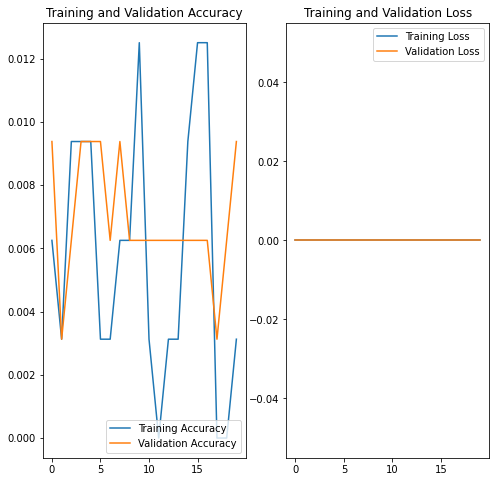

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Fine Tuning

In [ ]:
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)
base_model.trainable = False

In [ ]:
# the model: using VGG16 as a base model and apply transfer learning on it

inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = tf.keras.applications.vgg16.preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(102)(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
num_epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=num_epochs,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            # Stop training when `val_loss` is no longer improving
            monitor="val_loss",
            # "no longer improving" being defined as "no better than 1e-2 less"
            min_delta=1e-2,
            # "no longer improving" being further defined as "for at least 2 epochs"
            patience=2,
            verbose=1,
        )
    ]
)

Epoch 1/20
205/205 [==============================] - 2577s 12s/step - loss: 13.6615 - accuracy: 0.0169 - val_loss: 8.6373 - val_accuracy: 0.0244
Epoch 2/20
205/205 [==============================] - 40s 190ms/step - loss: 10.4751 - accuracy: 0.0368 - val_loss: 6.7080 - val_accuracy: 0.0721
Epoch 3/20
205/205 [==============================] - 41s 198ms/step - loss: 8.7763 - accuracy: 0.0644 - val_loss: 5.3906 - val_accuracy: 0.1198
Epoch 4/20
205/205 [==============================] - 40s 194ms/step - loss: 7.4027 - accuracy: 0.1021 - val_loss: 4.3911 - val_accuracy: 0.1944
Epoch 5/20
205/205 [==============================] - 41s 196ms/step - loss: 6.3017 - accuracy: 0.1442 - val_loss: 3.6059 - val_accuracy: 0.2861
Epoch 6/20
205/205 [==============================] - 41s 195ms/step - loss: 5.4136 - accuracy: 0.1925 - val_loss: 3.0111 - val_accuracy: 0.3692
Epoch 7/20
205/205 [==============================] - 41s 195ms/step - loss: 4.6253 - accuracy: 0.2442 - val_loss: 2.5281 - val_

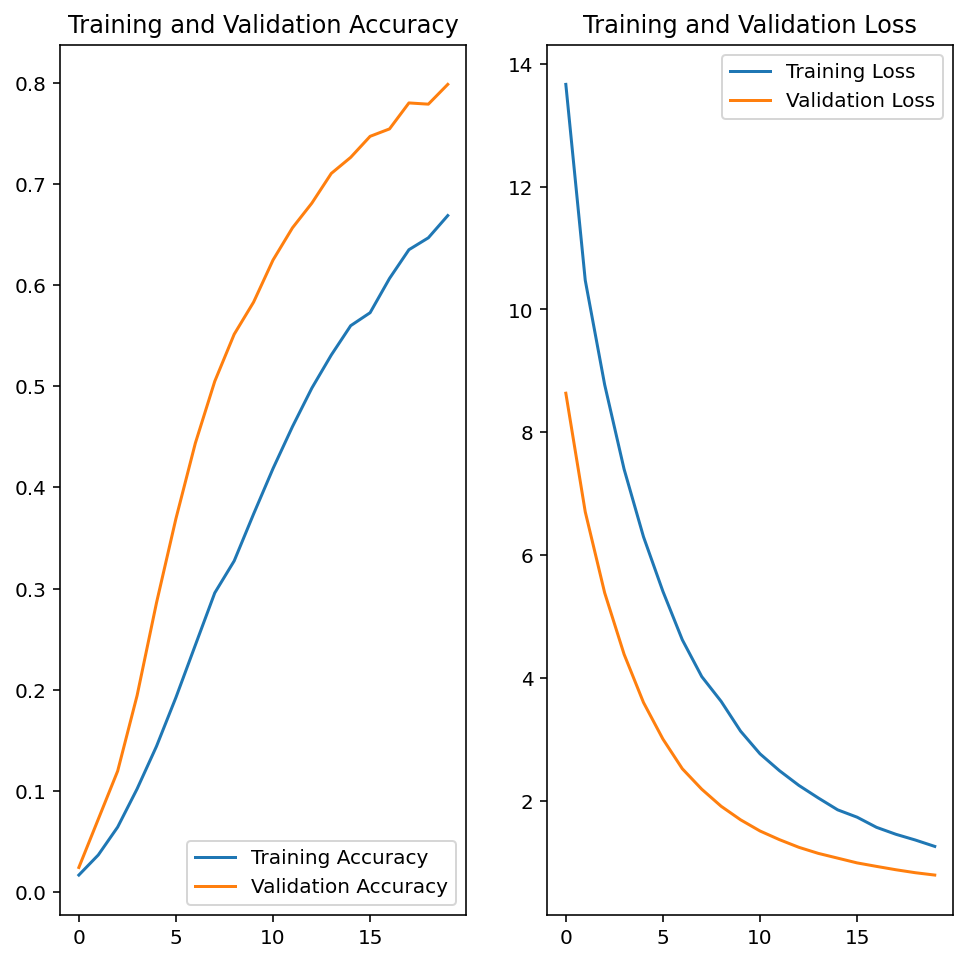

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()